Lambda School Data Science

*Unit 2, Sprint 1, Module 4*

---

# Logistic Regression


## Assignment 🌯

You'll use a [**dataset of 400+ burrito reviews**](https://srcole.github.io/100burritos/). How accurately can you predict whether a burrito is rated 'Great'?

> We have developed a 10-dimensional system for rating the burritos in San Diego. ... Generate models for what makes a burrito great and investigate correlations in its dimensions.

- [ ] Do train/validate/test split. Train on reviews from 2016 & earlier. Validate on 2017. Test on 2018 & later.
- [ ] Begin with baselines for classification.
- [ ] Use scikit-learn for logistic regression.
- [ ] Get your model's validation accuracy. (Multiple times if you try multiple iterations.)
- [ ] Get your model's test accuracy. (One time, at the end.)
- [ ] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

- [ ] Add your own stretch goal(s) !
- [ ] Make exploratory visualizations.
- [ ] Do one-hot encoding.
- [ ] Do [feature scaling](https://scikit-learn.org/stable/modules/preprocessing.html).
- [ ] Get and plot your coefficients.
- [ ] Try [scikit-learn pipelines](https://scikit-learn.org/stable/modules/compose.html).

In [38]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [39]:
# Load data downloaded from https://srcole.github.io/100burritos/
import pandas as pd
df = pd.read_csv(DATA_PATH+'burritos/burritos.csv')

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Yelp,87.0,3.887356,0.475396,2.50,3.500000,4.000000,4.000000,4.500000
Google,87.0,4.167816,0.373698,2.90,4.000000,4.200000,4.400000,5.000000
Cost,416.0,7.065216,1.503645,2.99,6.250000,6.990000,7.860000,25.000000
Hunger,420.0,3.496095,0.811466,0.50,3.000000,3.500000,4.000000,5.000000
Mass (g),22.0,546.181818,144.445619,350.00,450.000000,540.000000,595.000000,925.000000
Density (g/mL),22.0,0.675277,0.080468,0.56,0.619485,0.658099,0.721726,0.865672
Length,284.0,20.046901,2.084957,15.00,18.500000,20.000000,21.500000,26.000000
Circum,282.0,22.131738,1.777526,17.00,21.000000,22.000000,23.000000,29.000000
Volume,282.0,0.786489,0.152260,0.40,0.680000,0.770000,0.880000,1.540000
Tortilla,423.0,3.519385,0.793301,1.00,3.000000,3.500000,4.000000,5.000000


In [41]:
df.describe(include='object').T

,count,unique,top,freq
Location,423,108,Lucha Libre North Park,28
Burrito,423,132,California,101
Date,423,169,8/30/2016,29
Neighborhood,92,41,Clairemont,9
Address,88,87,9500 Gilman Dr,2
URL,87,86,https://www.yelp.com/biz/el-dorado-mexican-foo...,2
Chips,26,4,x,21
Rec,233,6,Yes,157
Reviewer,422,106,Scott,147
Notes,146,145,Bland,2


In [42]:
# Derive binary classification target:
# We define a 'Great' burrito as having an
# overall rating of 4 or higher, on a 5 point scale.
# Drop unrated burritos.
df = df.dropna(subset=['overall'])
df['Great'] = df['overall'] >= 4

In [43]:
# Clean/combine the Burrito categories
df['Burrito'] = df['Burrito'].str.lower()

california = df['Burrito'].str.contains('california')
asada = df['Burrito'].str.contains('asada')
surf = df['Burrito'].str.contains('surf')
carnitas = df['Burrito'].str.contains('carnitas')

df.loc[california, 'Burrito'] = 'California'
df.loc[asada, 'Burrito'] = 'Asada'
df.loc[surf, 'Burrito'] = 'Surf & Turf'
df.loc[carnitas, 'Burrito'] = 'Carnitas'
df.loc[~california & ~asada & ~surf & ~carnitas, 'Burrito'] = 'Other'

In [44]:
# Drop some high cardinality categoricals
df = df.drop(columns=['Notes', 'Location', 'Reviewer', 'Address', 'URL', 'Neighborhood'])

In [45]:
# Drop some columns to prevent "leakage"
df = df.drop(columns=['Rec', 'overall'])
df=df.dropna(axis=1, how='all')

In [46]:
object_columns=[]
for column in df.columns: 
    if df[column].dtype=='object':
        print(column)
        print(df[column].value_counts(), '\n\n')
        object_columns.append(column)

Burrito
California     169
Other          156
Asada           43
Surf & Turf     28
Carnitas        25
Name: Burrito, dtype: int64 


Date
8/30/2016    29
8/27/2019     9
6/24/2016     9
5/6/2016      7
4/15/2016     7
             ..
3/17/2016     1
8/10/2016     1
3/19/2016     1
7/19/2017     1
5/5/2016      1
Name: Date, Length: 169, dtype: int64 


Chips
x      21
X       3
No      1
Yes     1
Name: Chips, dtype: int64 


Unreliable
x    33
Name: Unreliable, dtype: int64 


NonSD
x    5
X    2
Name: NonSD, dtype: int64 


Beef
x    137
X     42
Name: Beef, dtype: int64 


Pico
x    127
X     31
Name: Pico, dtype: int64 


Guac
x    114
X     40
Name: Guac, dtype: int64 


Cheese
x    128
X     31
Name: Cheese, dtype: int64 


Fries
x    102
X     25
Name: Fries, dtype: int64 


Sour cream
x    67
X    25
Name: Sour cream, dtype: int64 


Pork
x    36
X    15
Name: Pork, dtype: int64 


Chicken
x    20
X     1
Name: Chicken, dtype: int64 


Shrimp
x    17
X     4
Name: Shrimp, dtyp

In [47]:
import numpy as np

for column in object_columns[2:]:
    df[column]=df[column].str.lower()
#    df[column]=df[column].str.replace('x', '1')
    df[column]=    df[column].str.replace('yes', 'x')
    df[column]=df[column].str.replace('no', '')
#    df[column]=df[column].str.replace(np.nan, '0')
#    df[column]=pd.to_numeric(df[column])
    print(column)
    print(df[column].value_counts(), '\n\n')
    
    
df

Chips
x    25
      1
Name: Chips, dtype: int64 


Unreliable
x    33
Name: Unreliable, dtype: int64 


NonSD
x    7
Name: NonSD, dtype: int64 


Beef
x    179
Name: Beef, dtype: int64 


Pico
x    158
Name: Pico, dtype: int64 


Guac
x    154
Name: Guac, dtype: int64 


Cheese
x    159
Name: Cheese, dtype: int64 


Fries
x    127
Name: Fries, dtype: int64 


Sour cream
x    92
Name: Sour cream, dtype: int64 


Pork
x    51
Name: Pork, dtype: int64 


Chicken
x    21
Name: Chicken, dtype: int64 


Shrimp
x    21
Name: Shrimp, dtype: int64 


Fish
x    6
Name: Fish, dtype: int64 


Rice
x    36
Name: Rice, dtype: int64 


Beans
x    35
Name: Beans, dtype: int64 


Lettuce
x    11
Name: Lettuce, dtype: int64 


Tomato
x    7
Name: Tomato, dtype: int64 


Bell peper
x    7
Name: Bell peper, dtype: int64 


Carrots
x    1
Name: Carrots, dtype: int64 


Cabbage
x    8
Name: Cabbage, dtype: int64 


Sauce
x    38
Name: Sauce, dtype: int64 


Salsa.1
x    7
Name: Salsa.1, dtype: int64 


Cila

,Burrito,Date,Yelp,Google,Chips,Cost,Hunger,Mass (g),Density (g/mL),Length,...,Nopales,Lobster,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Great
0,California,1/18/2016,3.5,4.2,NaN,6.49,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,California,1/24/2016,3.5,3.3,NaN,5.45,3.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,Carnitas,1/24/2016,NaN,NaN,NaN,4.85,1.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,Asada,1/24/2016,NaN,NaN,NaN,5.25,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,California,1/27/2016,4.0,3.8,x,6.59,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,Other,8/27/2019,NaN,NaN,NaN,6.00,1.0,NaN,NaN,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
419,Other,8/27/2019,NaN,NaN,NaN,6.00,4.0,NaN,NaN,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
420,California,8/27/2019,NaN,NaN,NaN,7.90,3.0,NaN,NaN,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
421,Other,8/27/2019,NaN,NaN,NaN,7.90,3.0,NaN,NaN,22.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [95]:
df.describe(include='object')

,Burrito,Date,Chips,Unreliable,NonSD,Beef,Pico,Guac,Cheese,Fries,...,Chile relleno,Nopales,Lobster,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini
count,421,421,26,33,7,179,158,154,159,127,...,4,4,1,5,3,3,2,13,3,1
unique,5,169,2,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,California,8/30/2016,x,x,x,x,x,x,x,x,...,x,x,x,x,x,x,x,x,x,x
freq,169,29,25,33,7,179,158,154,159,127,...,4,4,1,5,3,3,2,13,3,1


#### Now I can do a test/train split.
Do train/validate/test split. Train on reviews from 2016 & earlier. Validate on 2017. Test on 2018 & later.

In [96]:

train = df[pd.to_datetime(df['Date']).dt.year<2017]
val=df[pd.to_datetime(df['Date']).dt.year==2017]
test= df[pd.to_datetime(df['Date']).dt.year>2017]

train.shape, val.shape, test.shape

((298, 58), (85, 58), (38, 58))

In [97]:
target='Great'
features=train.columns.drop(['Date', 'Great'])

X_train=train[features]
X_val=val[features]
X_test=test[features]

y_train=train[target]
y_val=val[target]
y_test=test[target]

<h3>Begin with baselines for classification</h3>
Determine majority class


In [98]:
majority_class=y_train.mode()
y_pred=[majority_class]*len(y_train)

Use classification metric: accuracy 

In [99]:
from sklearn.metrics import accuracy_score
accuracy_train= accuracy_score(y_train, y_pred)

y_pred=[majority_class]*len(y_val)
accuracy_val = accuracy_score(y_val, y_pred)

print(f'Baseline: majority class of our data set is {majority_class[0]}, \nour model accuracy is TRAIN: {accuracy_train:.2f}, \nVAL: {accuracy_val:.2f}')


Baseline: majority class of our data set is False, 
our model accuracy is TRAIN: 0.59, 
VAL: 0.55


<h3>Use scikit-learn for logistic regression.</h3>

<h4>First, transformer and estimator sequence</h4>
<li>category_encoders.one_hot.OneHotEncoder</li>
<li>sklearn.impute.SimpleImputer</li>
<li>sklearn.preprocessing.StandardScaler</li>
<li>sklearn.linear_model.LogisticRegressionCV</li>

In [138]:

import category_encoders as ce 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV


In [139]:
#Encoding Burrito column

X_train

,Burrito,Yelp,Google,Chips,Cost,Hunger,Mass (g),Density (g/mL),Length,Circum,...,Chile relleno,Nopales,Lobster,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini
0,California,3.5,4.2,NaN,6.49,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,California,3.5,3.3,NaN,5.45,3.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Carnitas,NaN,NaN,NaN,4.85,1.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Asada,NaN,NaN,NaN,5.25,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,California,4.0,3.8,x,6.59,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,California,4.0,4.3,NaN,5.65,3.0,NaN,NaN,19.5,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,Other,NaN,NaN,NaN,5.49,3.0,NaN,NaN,19.0,20.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,California,3.5,3.7,NaN,7.75,4.0,NaN,NaN,20.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299,Asada,NaN,NaN,NaN,7.75,4.0,NaN,NaN,19.5,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
encoder=ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)


In [149]:
X_train_encoded.isna().sum().sort_values().tail(20)

Guac_nan            0
Guac_x              0
Fries_nan           0
Fillings            1
Hunger              1
Synergy             2
Uniformity          2
Wrap                2
Cost                6
Meat:filling        6
Meat               10
Temp               15
Salsa              20
Length            123
Circum            124
Volume            124
Google            227
Yelp              227
Density (g/mL)    298
Mass (g)          298
dtype: int64

In [143]:
#I'm going to impude NaNs for numeric columns
imputer = SimpleImputer(strategy='mean')
X_train_imputed=imputer.fit_transform(X_train_encoded)
X_val_imputed = imputer.transform(X_val_encoded)


In [144]:
X_train_imputed.shape

(298, 95)

In [107]:
#Fit a model 

import warnings
warnings.filterwarnings('ignore')

model=LogisticRegressionCV()
model.fit(X_train_imputed, y_train)
print('Validation accuracy', model.score(X_val_imputed, y_val))




Validation accuracy 0.8470588235294118


In [108]:
#Get your model's test accurtacy

X_test_encoded=encoder.transform(X_test)
X_test_imputed=imputer.transform(X_test_encoded)
print('Test accuracy:', model.score(X_test_imputed, y_test))

Test accuracy: 0.7894736842105263


In [164]:
columns=X_train_encoded.columns.drop(['Density (g/mL)','Mass (g)'])

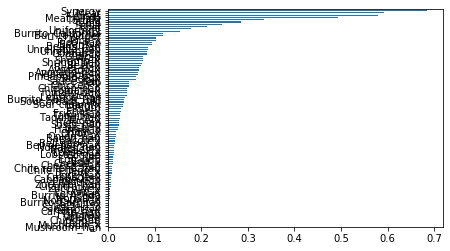

In [166]:
#Plot coefficients 

%matplotlib inline
coefficients = pd.Series(model.coef_[0], columns)
coefficients.sort_values().plot.barh();

In [168]:
coefficients.sort_values()

Burrito_Other    -0.117391
Pico_x           -0.102438
Beans_x          -0.094273
Unreliable_nan   -0.085907
Guac_nan         -0.082951
                    ...   
Tortilla          0.333757
Meat:filling      0.493362
Fillings          0.579301
Meat              0.591869
Synergy           0.684332
Length: 95, dtype: float64

<h2>Try out Logistic Regression with multiple values C </h2>

In [171]:
from sklearn.linear_model import LogisticRegression 
for c in [0.001, 0.01, 0.1, 1,10.0,100.0,1000.0]:
    model = LogisticRegression(C=c)
    model.fit(X_train_imputed, y_train)
    print(f'Validation accuracy with C={c}: {model.score(X_val_imputed, y_val):.2f}')

Validation accuracy with C=0.001: 0.60
Validation accuracy with C=0.01: 0.76
Validation accuracy with C=0.1: 0.84
Validation accuracy with C=1: 0.81
Validation accuracy with C=10.0: 0.78
Validation accuracy with C=100.0: 0.78
Validation accuracy with C=1000.0: 0.76
